In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from string import ascii_letters

from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

import lightgbm as lgbm
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


# 1 EDA

## 1.1 Data loading
### Using craigslist_car Data 

In [2]:
df = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv")
pd.options.display.max_columns = 26
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

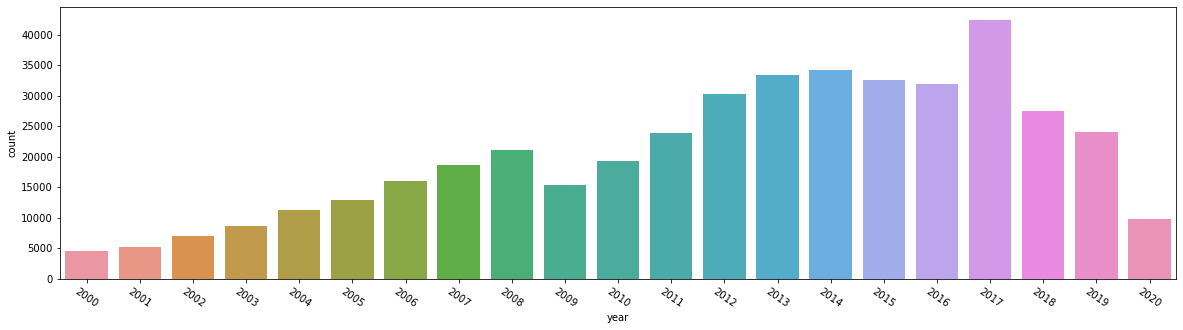

In [4]:
df = df[(df["year"]>1999) & (df["year"]<2021)].copy()
df["year"] = df["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df,x="year")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430479 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    430479 non-null  int64  
 1   id            430479 non-null  int64  
 2   url           430479 non-null  object 
 3   region        430479 non-null  object 
 4   region_url    430479 non-null  object 
 5   price         430479 non-null  int64  
 6   year          430479 non-null  int64  
 7   manufacturer  416648 non-null  object 
 8   model         427011 non-null  object 
 9   condition     247272 non-null  object 
 10  cylinders     268347 non-null  object 
 11  fuel          427533 non-null  object 
 12  odometer      383185 non-null  float64
 13  title_status  428225 non-null  object 
 14  transmission  428164 non-null  object 
 15  VIN           264418 non-null  object 
 16  drive         306251 non-null  object 
 17  size          126114 non-null  object 
 18  type

In [6]:
for col in df:
    print(f"{y_}{col}\n")
    print(f"{b_}{df[col].unique()}\n")


Unnamed: 0

[     0      1      2 ... 458210 458211 458212]

id

[7240372487 7240309422 7240224296 ... 7240645700 7240600465 7240562359]

url

['https://auburn.craigslist.org/ctd/d/auburn-university-2010-chevy-chevrolet/7240372487.html'
 'https://auburn.craigslist.org/cto/d/auburn-2014-hyundai-sonata-20t/7240309422.html'
 'https://auburn.craigslist.org/cto/d/auburn-2006-bmw-x3/7240224296.html'
 ...
 'https://wyoming.craigslist.org/cto/d/sheridan-2014-cadillac-cts-coupe-awd/7240645700.html'
 'https://wyoming.craigslist.org/cto/d/sheridan-2008-jeep-grand-cherokee/7240600465.html'
 'https://wyoming.craigslist.org/ctd/d/gilberts-international-4300-altec/7240562359.html']

region

['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'faye

## 1.2 Extract the requird data
### I will use data about price, year, manufacturer, model, condition, transmission, type, paint_color, state, lat, long

In [7]:
columns=[ "price", "year", "cylinders","manufacturer", "model", "odometer","condition","fuel","region", "transmission", "drive","type","title_status", "paint_color", "state", "lat", "long"]

In [8]:
df = df[columns]

In [9]:
print(df.isnull().sum())



price                0
year                 0
cylinders       162132
manufacturer     13831
model             3468
odometer         47294
condition       183207
fuel              2946
region               0
transmission      2315
drive           124228
type            102221
title_status      2254
paint_color     130844
state                0
lat               7269
long              7269
dtype: int64




As we can see there are many columns with missing values. We need to handle those missing values and clean the data for accuarate prediction.

Clean the data. Since here missing values are very large in numbers, we are only going to keep columns which have less than 55% of missing values.


In [10]:
null_val = df.isna().sum()
def na_filter(na, threshold = .55): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
vehicles_cleaned = df[na_filter(null_val)]
vehicles_cleaned.columns

Index(['price', 'year', 'cylinders', 'manufacturer', 'model', 'odometer',
       'condition', 'fuel', 'region', 'transmission', 'drive', 'type',
       'title_status', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [11]:
vehicles_cleaned.manufacturer.unique()

array(['chevrolet', 'hyundai', 'bmw', 'ford', 'toyota', 'jeep', 'ram',
       nan, 'honda', 'dodge', 'lexus', 'mercedes-benz', 'cadillac', 'gmc',
       'subaru', 'infiniti', 'mazda', 'mini', 'nissan', 'volkswagen',
       'kia', 'mitsubishi', 'buick', 'audi', 'rover', 'chrysler', 'fiat',
       'lincoln', 'acura', 'volvo', 'pontiac', 'tesla', 'saturn',
       'mercury', 'porsche', 'jaguar', 'ferrari', 'harley-davidson',
       'land rover', 'alfa-romeo', 'aston-martin', 'datsun', 'morgan',
       'hennessey'], dtype=object)

In [12]:
vehicles_cleaned.model.unique()

array(['corvette grand sport', 'sonata', 'x3 3.0i', ..., '3200',
       'bluebird 4300', 'caravana'], dtype=object)

In [13]:
vehicles_cleaned.cylinders.unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [14]:
vehicles_cleaned.title_status.unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', nan,
       'parts only'], dtype=object)

In [15]:
vehicles_cleaned.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [16]:
vehicles_cleaned.drive.unique()

array(['rwd', 'fwd', nan, '4wd'], dtype=object)

In [17]:
vehicles_cleaned.type.unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', nan, 'truck',
       'mini-van', 'wagon', 'convertible', 'hatchback', 'bus', 'offroad'],
      dtype=object)

In [18]:
vehicles_cleaned.paint_color.unique()

array([nan, 'blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'custom', 'brown', 'yellow', 'purple'], dtype=object)

In [19]:
vehicles_cleaned.describe()

,price,year,odometer,lat,long
count,4.304790e+05,430479.000000,3.831850e+05,423210.000000,423210.000000
mean,3.817461e+04,2012.289419,9.980204e+04,38.555546,-94.280149
std,8.235427e+06,4.933574,3.309354e+06,5.872603,18.077770
min,0.000000e+00,2000.000000,0.000000e+00,-82.607549,-164.091797
25%,4.995000e+03,2009.000000,4.065000e+04,34.632372,-110.570934
50%,1.149900e+04,2013.000000,8.676400e+04,39.300000,-88.200500
75%,2.198950e+04,2016.000000,1.324790e+05,42.504823,-80.969297
max,3.615215e+09,2020.000000,2.043756e+09,82.049255,94.163200


In [20]:
vehicles_cleaned.shape

(430479, 17)

In [21]:
vehicles_df = vehicles_cleaned.dropna()



In [22]:
vehicles_df.shape

(122714, 17)

In [23]:
df= df.replace(to_replace ="f150", 
                 value ="f-150") 

In [24]:
colors = ["#C0FDFF", "#C8E7FF","#D0D1FF","#D8BBFF","#DEAAFF","#E2AFFF","#E5B3FE","#ECBCFD","#F3C4FB","#FFCBF2"]
sns.set_palette(sns.color_palette(colors))

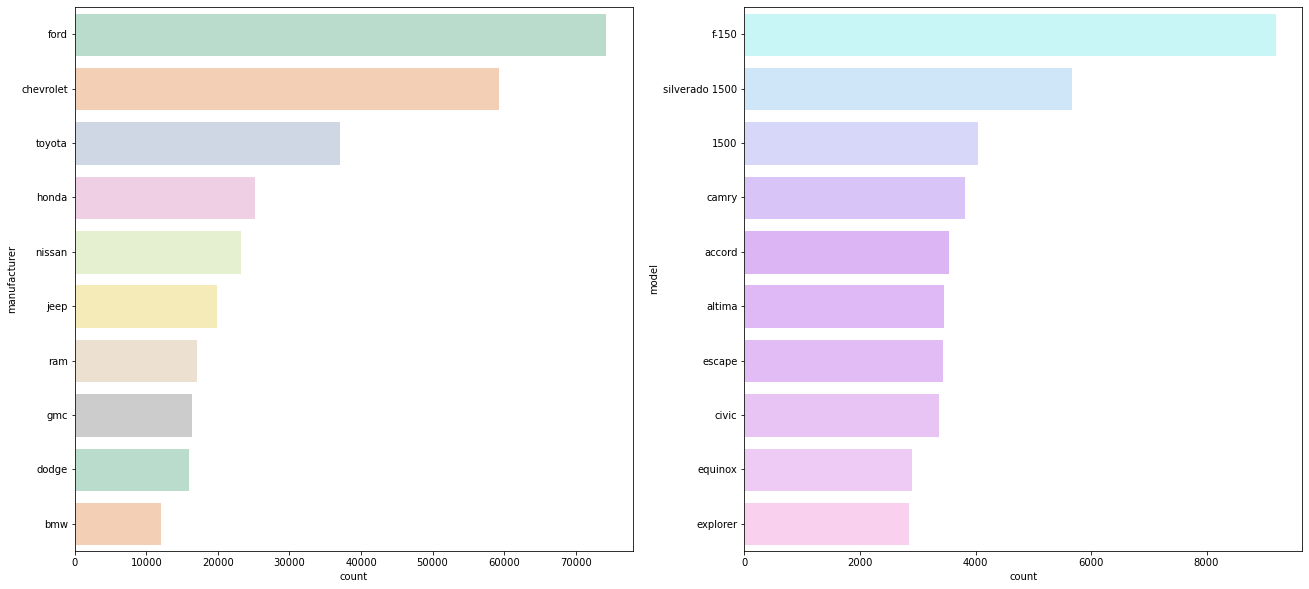

In [25]:
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax = ax[1],palette = colors) 
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

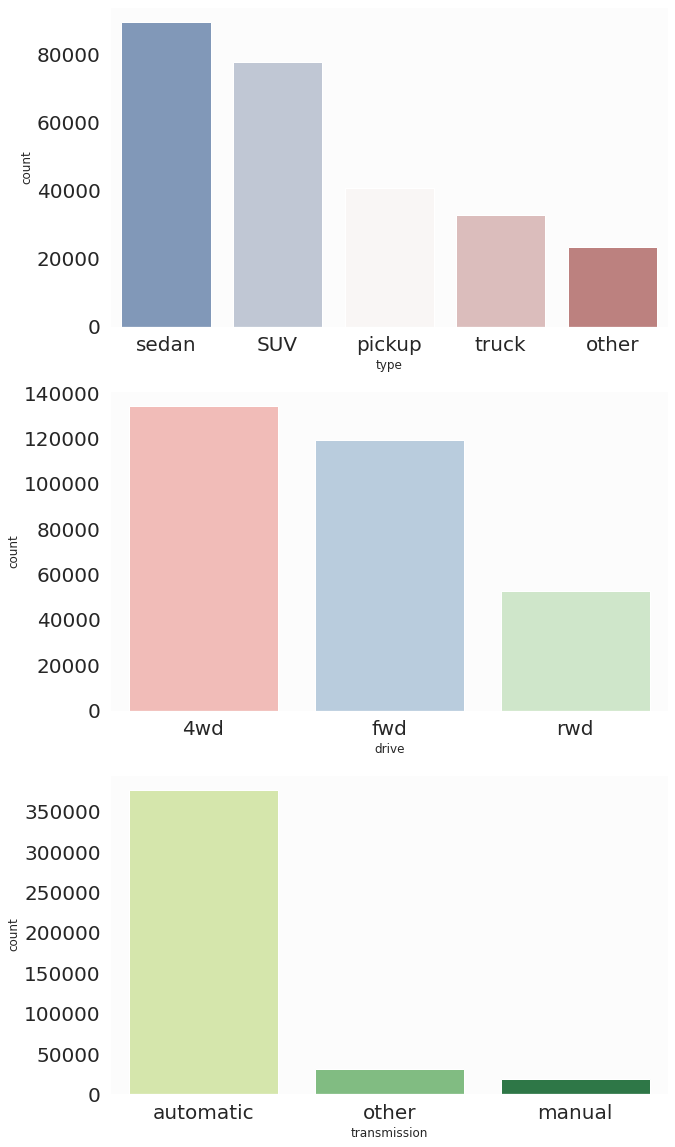

In [26]:
fig, ax =plt.subplots(3,1,figsize=(10, 20))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='type',data = df,order=df.type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drive',data = df,order=df.drive.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

In [27]:
#fig =px.sunburst(
#    result,path=['Manufacturer','index'],values='model', color='Manufacturer'
#                  )
#fig.update_layout(margin=dict(t=1, b=1, r=1, l=1))
#fig.show()

# 2.Compare Vehicle purchase by year

 ## 2.1 Vehicle purchase from 2000 to 2020

### We can know that '2000 ~ 2008' Vehicle purchase increase and '2009' decrease. 
### After '2009' increase again until '2017' that is the best purchase year and then decrease Now...

## 2.1.1 Vehicle purchase from 2010 to 2020

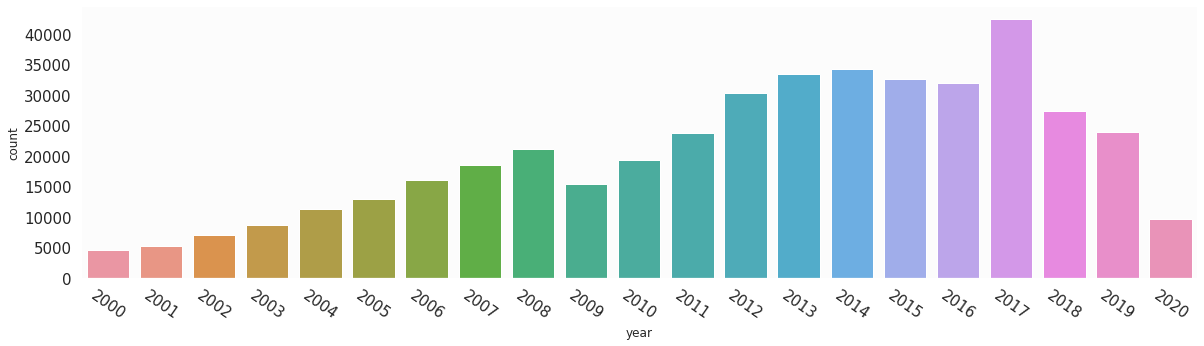

In [31]:
df_year = df[(df["year"]>1999) & (df["year"]<2021)].copy()#
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

## 2.2 Compare price by year

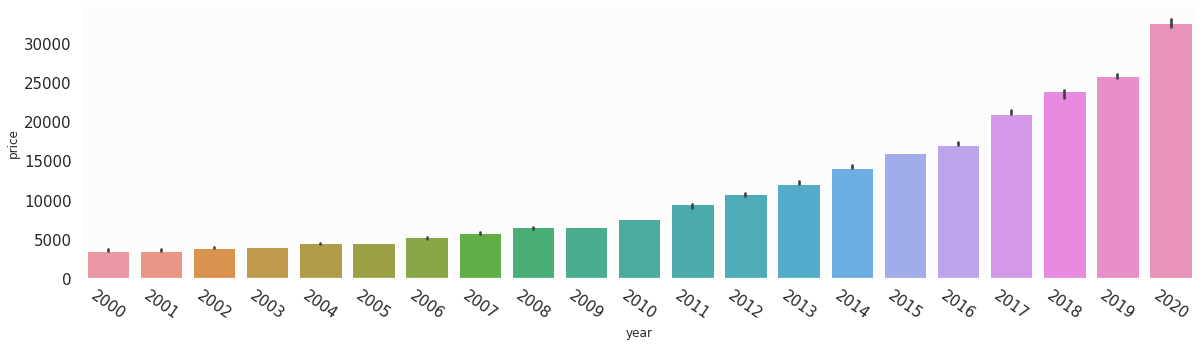

In [32]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df_year,x="year", y= "price",estimator=median)
plt.show()

### We can know vehicle's price is increasing from median graph

# 3. Manufacturer's Comparing

# 3.1 Changes in manufacturer's share by year

In [33]:
df_year["tmp"] = 1
data = pd.pivot_table(df_year, index = "manufacturer", columns="year",values="tmp",aggfunc=np.sum)
data = data.fillna(0)
data.loc['others'] = data[data<200].sum()
data[data<200] = 0

data

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
manufacturer,,,,,,,,,,,,,,,,,,,,,
acura,0.0,0.0,0.0,0.0,0.0,221.0,290.0,217.0,238.0,204.0,271.0,0.0,347.0,256.0,209.0,0.0,234.0,271.0,0.0,0.0,0.0
alfa-romeo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aston-martin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
audi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,225.0,239.0,335.0,522.0,518.0,547.0,429.0,400.0,743.0,532.0,0.0,0.0
bmw,0.0,0.0,0.0,0.0,282.0,209.0,474.0,518.0,626.0,407.0,316.0,1085.0,857.0,1519.0,1289.0,896.0,699.0,1229.0,733.0,0.0,0.0
buick,0.0,0.0,0.0,0.0,0.0,267.0,225.0,224.0,271.0,0.0,265.0,444.0,385.0,339.0,350.0,319.0,623.0,558.0,0.0,0.0,0.0
cadillac,0.0,0.0,0.0,0.0,222.0,207.0,260.0,351.0,347.0,280.0,276.0,384.0,418.0,780.0,470.0,324.0,370.0,563.0,210.0,0.0,235.0
chevrolet,558.0,596.0,955.0,1054.0,1537.0,1686.0,1960.0,2617.0,2628.0,2187.0,2514.0,3580.0,4386.0,4269.0,4781.0,5340.0,4280.0,5654.0,4152.0,2858.0,1674.0
chrysler,0.0,0.0,0.0,0.0,232.0,393.0,450.0,383.0,541.0,223.0,417.0,333.0,513.0,628.0,577.0,787.0,440.0,378.0,266.0,244.0,0.0


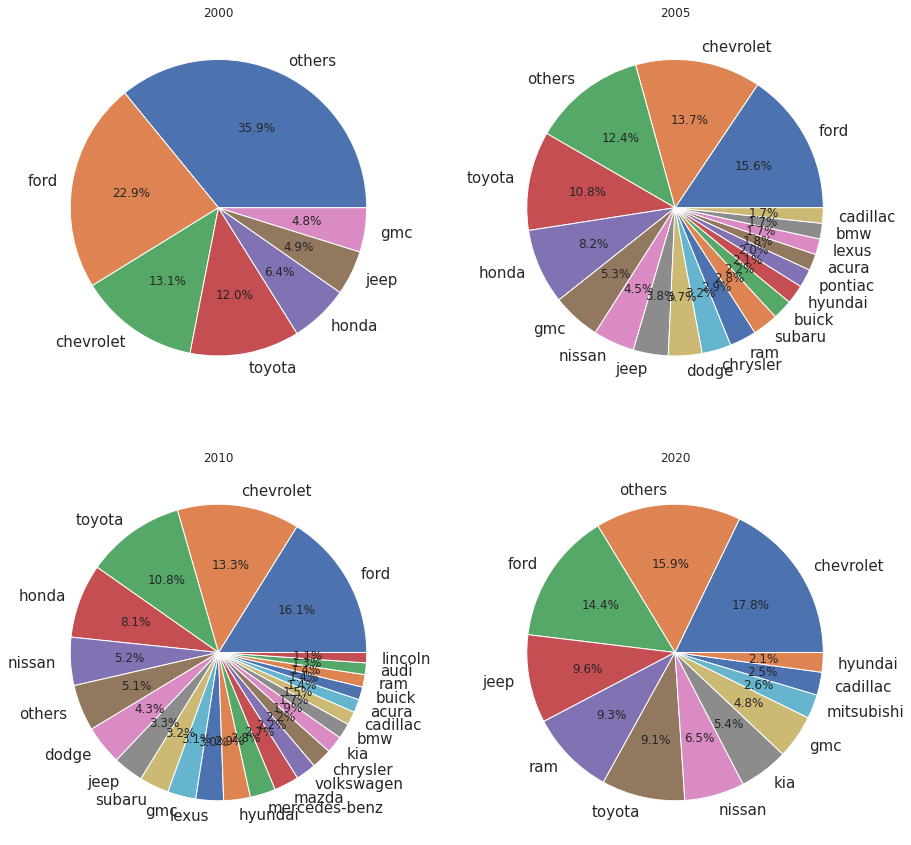

In [34]:
df_year["tmp"] = 1
data = pd.pivot_table(df_year, index = "manufacturer", columns="year",values="tmp",aggfunc=np.sum)
data = data.fillna(0)
data.loc['others'] = data[data<200].sum()
data[data<200] = 0

plt.figure(figsize=(15,15))
tmp_data1 = data[2000].sort_values(ascending=False)
plt.subplot(221)
tmp_data1[tmp_data1>0].plot.pie(autopct="%.1f%%",title="2000")
plt.axis("off")

tmp_data2 = data[2005].sort_values(ascending=False)
plt.subplot(222)
tmp_data2[tmp_data2>0].plot.pie(autopct="%.1f%%",title="2005")
plt.axis("off")

tmp_data3 = data[2010].sort_values(ascending=False)
plt.subplot(223)
tmp_data3[tmp_data3>0].plot.pie(autopct="%.1f%%",title="2010")
plt.axis("off")

tmp_data4 = data[2020].sort_values(ascending=False)
plt.subplot(224)
tmp_data4[tmp_data4>0].plot.pie(autopct="%.1f%%",title="2020")
plt.axis("off")
plt.show()

### We can know that the Craigslist_car trade share is Changing so many, Now In 2020 chevrolet is the largest manufacturer

## 3.2 Favorite model comparing ( Top 10 )

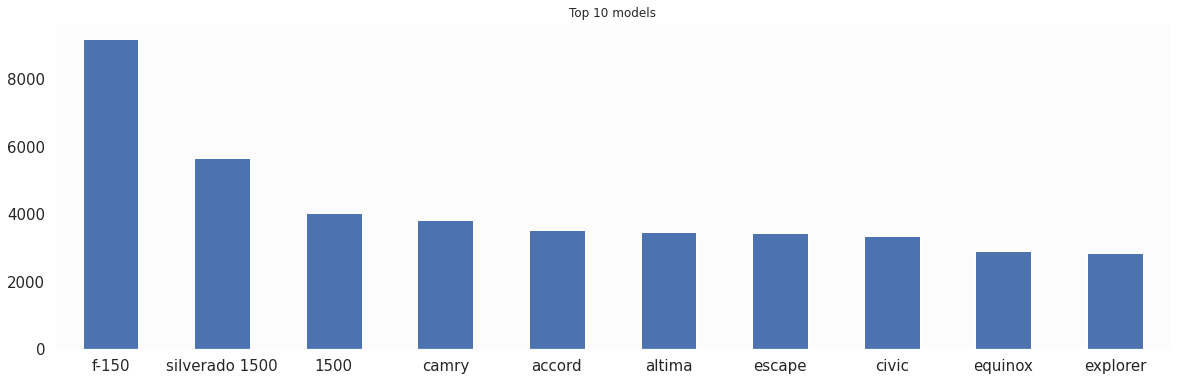

In [35]:
df_year['model'].value_counts().head(10).plot.bar(figsize=(20,6),rot=0, title="Top 10 models")
plt.show()

## The best seller model is Ford's f-150, and then, Second is chevrolet's silverado 1500

# 4. Best Color and, condition's by color and type

## 4.1 Best Color

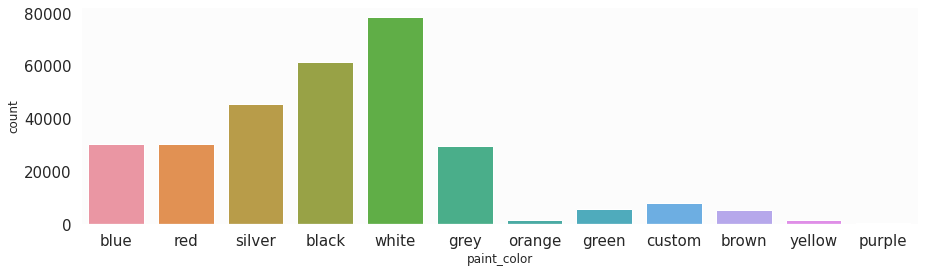

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year,x="paint_color")
plt.show()

### THe best color is White, and Black,and then compare condition by color

## 4.2 Compare condition by color,
### Many people, including me, recognize that black color is good for getting dirty. Let's compare this

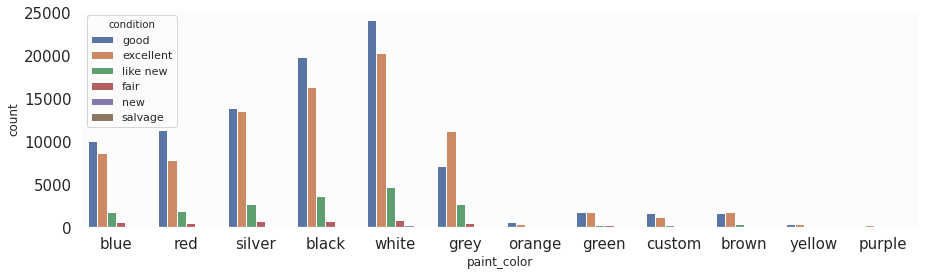

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.show()

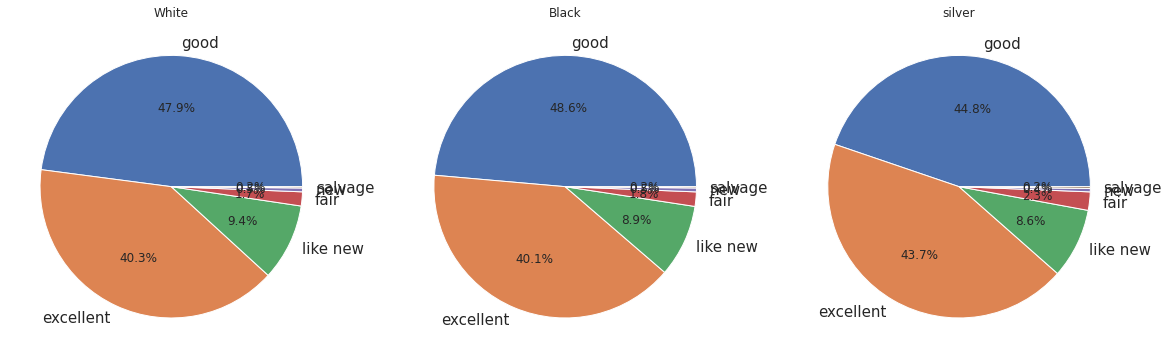

In [38]:
plt.figure(figsize=(20,15))

plt.subplot(131)
df_year['condition'][df_year["paint_color"]=="white"].value_counts().plot.pie(autopct='%.1f%%',title="White")
plt.axis('off')

plt.subplot(132)
df_year['condition'][df_year["paint_color"]=="black"].value_counts().plot.pie(autopct='%.1f%%',title="Black")
plt.axis('off')


plt.subplot(133)
df_year['condition'][df_year["paint_color"]=="silver"].value_counts().plot.pie(autopct='%.1f%%',title="silver")
plt.axis('off')

plt.show()

### I think, Car condition has no difference by color

## 4.3 Car type Compare with condition
### First, Analysis Car Type share

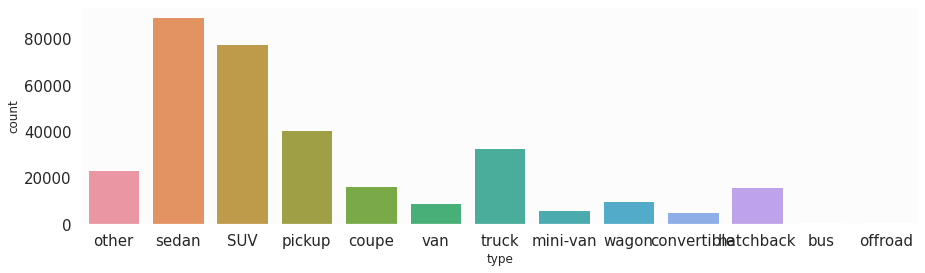

In [39]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year,x="type")
plt.show()

### The most type is sedan, and next SUV pickup, truck type and then compare with condition. I predict truck type's condition is worse than other type

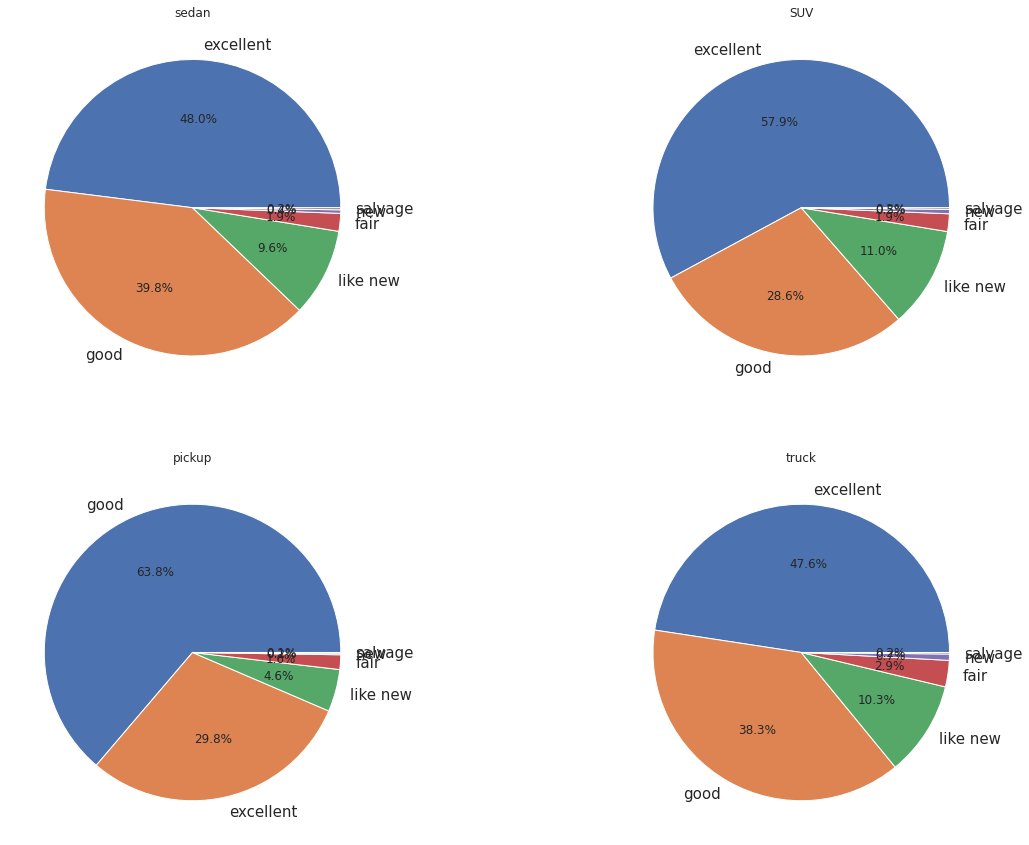

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(221)
df_year["condition"][df_year["type"]=='sedan'].value_counts().plot.pie(autopct = '%.1f%%', title="sedan")
plt.axis('off')

plt.subplot(222)
df_year["condition"][df_year["type"]=='SUV'].value_counts().plot.pie(autopct = '%.1f%%', title="SUV")
plt.axis('off')

plt.subplot(223)
df_year["condition"][df_year["type"]=='pickup'].value_counts().plot.pie(autopct = '%.1f%%', title="pickup")
plt.axis('off')

plt.subplot(224)
df_year["condition"][df_year["type"]=='truck'].value_counts().plot.pie(autopct = '%.1f%%', title="truck")
plt.axis('off')

plt.show()

# 5. Region Compare

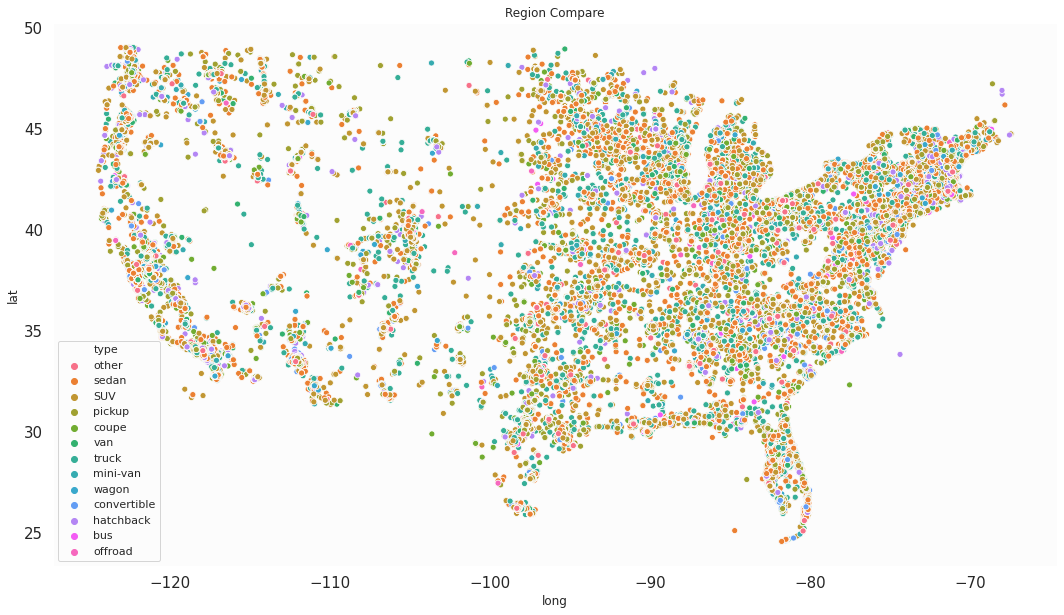

In [41]:
df_local = df_year[(df_year['lat']>24) & (df_year['lat']<50) & (df_year['long']>-125) & (df_year['long']<-65)]
plt.figure(figsize=(18,10))
plt.title('Region Compare')
sns.scatterplot(data=df_local, x="long",y="lat",hue='type')
plt.show()

### Vehicle type also have no diffrence by region

# Data Engineering

In [42]:
vehicles_df = df[['price','region','year','manufacturer','model','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']]

In [43]:
vehicles_df.describe()

,price,year,odometer
count,4.304790e+05,430479.000000,3.831850e+05
mean,3.817461e+04,2012.289419,9.980204e+04
std,8.235427e+06,4.933574,3.309354e+06
min,0.000000e+00,2000.000000,0.000000e+00
25%,4.995000e+03,2009.000000,4.065000e+04
50%,1.149900e+04,2013.000000,8.676400e+04
75%,2.198950e+04,2016.000000,1.324790e+05
max,3.615215e+09,2020.000000,2.043756e+09


thanksto https://www.kaggle.com/anerisavani/eda-and-price-prediction-of-used-vehicles

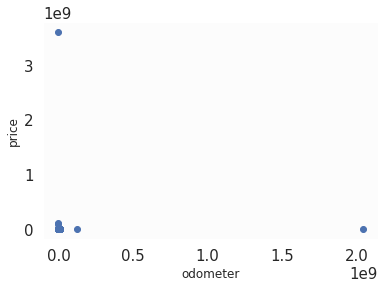

In [44]:
#Let's check distribution of all predictors with respect to target(price) for general understanding.
y = vehicles_df['price']
x = vehicles_df['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

In [45]:
# from the my kernel: https://www.kaggle.com/vbmokin/automatic-selection-from-20-classifier-models
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = vehicles_df.columns.values.tolist()
for col in features:
    if vehicles_df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in vehicles_df.columns:
        le = LabelEncoder()
        le.fit(list(vehicles_df[col].astype(str).values))
        vehicles_df[col] = le.transform(list(vehicles_df[col].astype(str).values))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
vehicles_df.head()

,price,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,35990,16,2010,7,9543,6,2,32742.0,0,3,3,8,6,1
1,7500,16,2014,18,22853,3,2,93600.0,0,0,1,10,6,1
2,4900,16,2006,4,25977,5,2,87046.0,0,0,2,0,1,1
4,19500,16,2005,13,13612,6,0,116000.0,1,0,0,9,1,1
5,29590,16,2016,41,23772,5,2,33290.0,0,3,2,9,9,1


In [47]:
# Thanks to : https://www.kaggle.com/aantonova/some-new-risk-and-clusters-features
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

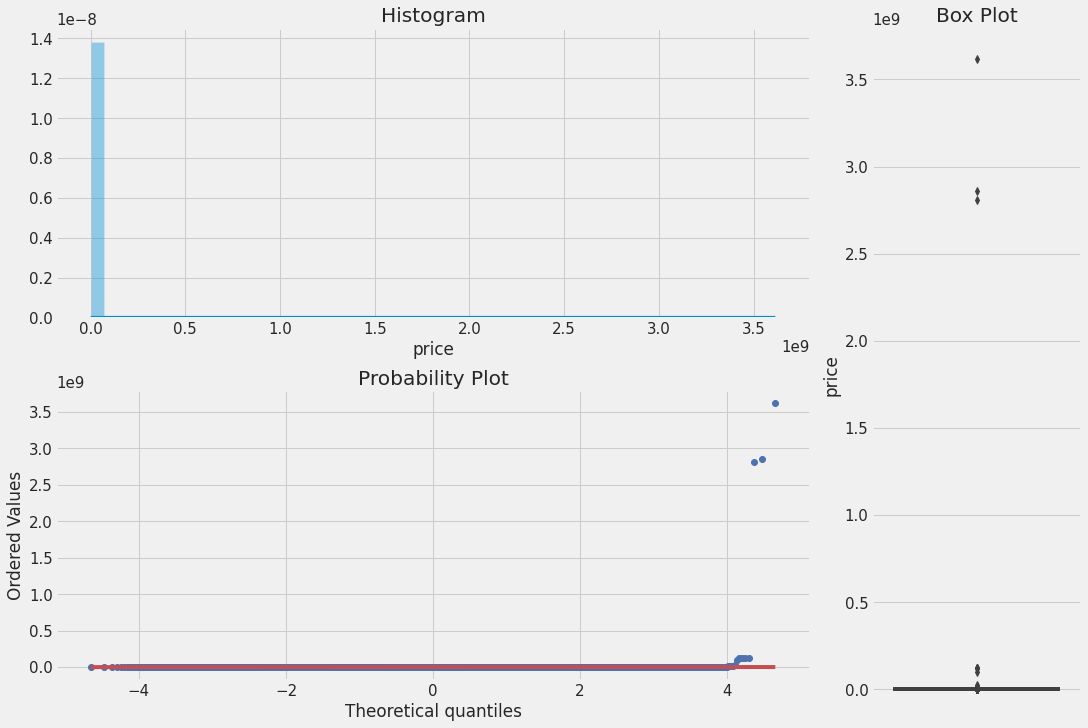

In [48]:
#Thanks to https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(df, 'price')

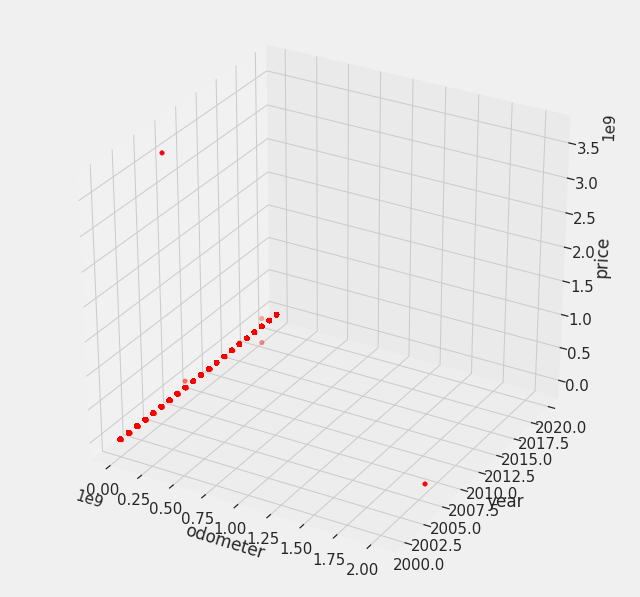

In [49]:
#Thanks to https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['odometer']
y_points = df['year']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('price')

plt.show()

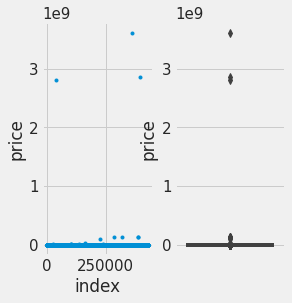

In [51]:
y = np.array(df.price)
plt.subplot(131)
plt.plot(range(len(y)),y,'.');plt.ylabel('price');plt.xlabel('index');
plt.subplot(132)
sns.boxplot(y=df.price)

In [52]:
train_stat = df.describe(percentiles = [.05,.1, .9,.95])
train_stat

,price,year,odometer,lat,long
count,4.304790e+05,430479.000000,3.831850e+05,423210.000000,423210.000000
mean,3.817461e+04,2012.289419,9.980204e+04,38.555546,-94.280149
std,8.235427e+06,4.933574,3.309354e+06,5.872603,18.077770
min,0.000000e+00,2000.000000,0.000000e+00,-82.607549,-164.091797
5%,0.000000e+00,2003.000000,8.707000e+03,28.329017,-122.579503
10%,5.000000e+02,2005.000000,1.800000e+04,30.330000,-121.320559
50%,1.149900e+04,2013.000000,8.676400e+04,39.300000,-88.200500
90%,3.380000e+04,2018.000000,1.740000e+05,45.232778,-74.352011
95%,3.999000e+04,2019.000000,2.000000e+05,47.199100,-72.996300
max,3.615215e+09,2020.000000,2.043756e+09,82.049255,94.163200
